# Sentiment Analysis (Pemilu Indonesia)

#### Data Set: https://gitlab.com/azizp/sentimen-analisis-isu-penundaan-pemilu

#### Paper:http://jurnal.atmaluhur.ac.id/index.php/sisfokom/article/view/1412/826

#### researchgate : https://www.researchgate.net/profile/Aziz-Perdana

Baca data trainingsetNBC dan testSetNBC
DROP jika ada duplikat di kolom Text

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score


#dataset = pd.read_csv('./train.csv', delimiter=',')
#print('mulai')
#dataset = pd.read_excel('./export_pemilu_in28FebwithSentiment.xlsx', sheet_name='Sheet1')
#dataset = pd.read_excel('./trainingsetNBC.xlsx', sheet_name='Sheet1')
dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ml-project/trainingsetNBC.xlsx', sheet_name='Sheet1')


#sub_test_path = "testsetNBC.xlsx"
sub_test_path = "/content/drive/MyDrive/Colab Notebooks/ml-project/testsetNBC.xlsx"
test_df = pd.read_excel(sub_test_path)


Use: dataset.info() to get the summary of different columns, if any column contains any row (if yes, then how many?) with Na values. Use datase.head(), dataset.tail(), dataset.describe(), dataset['$ColumnName'] e.t.c to gain more insight into the dataset.

Use: dataset.$ColumnName.value_count() to get the information about any particular column.

In [27]:
dataset.Sentiment.value_counts()
dataset.groupby('Sentiment').describe()

Unnamed: 0                                                          \
               count    mean        std    min     25%    50%     75%    max   
Sentiment                                                                      
1              100.0   65.36  63.345058    0.0   24.75   49.5   74.25  289.0   
2              100.0  187.64  76.067424   87.0  111.75  210.0  262.25  299.0   
3              100.0  195.50  46.587487  134.0  158.75  183.5  226.00  298.0   

          Followers                 ... Retweet        Likes             \
              count           mean  ...     75%    max count       mean   
Sentiment                           ...                                   
1              87.0   54387.988506  ...    1.00   39.0  87.0   5.666667   
2              66.0  180300.090909  ...    0.75  376.0  66.0  28.621212   
3              61.0   88481.262295  ...    0.00   59.0  61.0   8.491803   

                                                   
                  std  min  25%  50%  75%     max  
Sentiment                                          
1           20.251136  0.0  0.0  0.0  2.0   168.0  
2          152.791136  0.0  0.0  1.0  5.0  1235.0  
3           35.111547  0.0  0.0  0.0  1.0   246.0  

[3 rows x 32 columns]

Text(0, 0.5, 'Labels')

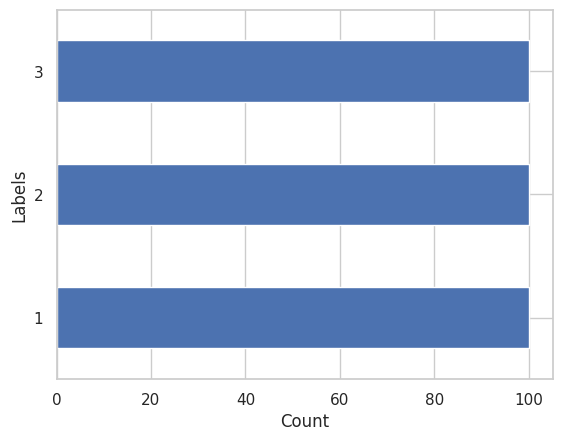

In [28]:
sns.set_theme(style="whitegrid")
ax = dataset['Sentiment'].value_counts(sort=False).plot(kind='barh', color='b')
ax.set_xlabel('Count')
ax.set_ylabel('Labels')

Text(0.5, 1.0, 'Distribusi Panjang Teks')

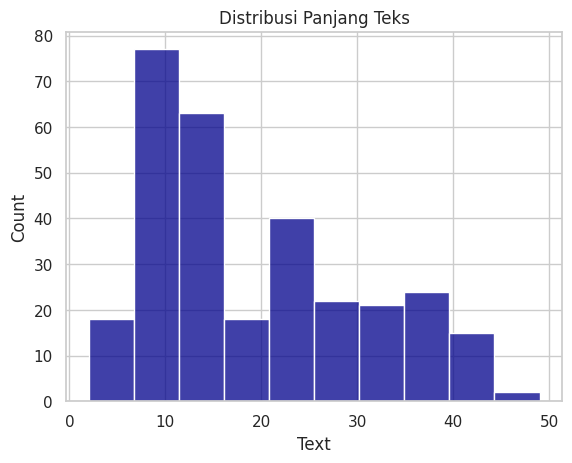

In [29]:
sns.histplot(data=dataset, x=dataset.Text.str.split().str.len(), bins='auto', color='darkblue');
plt.title('Distribusi Panjang Teks')

In [30]:
import re
from bs4 import BeautifulSoup

In [31]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
#pat1 = r'@[A-Za-z0-9]+'
#remove mention  dengan underscore
pat1 = r'@[A-Za-z0-9_]+'
#re.sub("@[A-Za-z0-9_]+","", tweet)
pat2 = r'https?://[A-Za-z0-9./]+'
#remove hashtag dengan underscore
#re.sub("#[A-Za-z0-9_]+","", clean_tweet)
pat3 = r'#[A-Za-z0-9_]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [32]:
import re
import string
import unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

In [33]:
def remove_stopword(str):
    stop_words = set(stopwords.words('indonesian'))
    word_tokens = word_tokenize(str)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

In [34]:
testing = dataset.Text[:dataset.size]
#testing = dataset.Text[:dataset.size]
train_clean = []
for t in testing:
    train_clean.append(tweet_cleaner(str(t)))

train_clean
dataset['Text'] = train_clean

In [35]:
testing = test_df.Text[:test_df.size]
#testing = dataset.Text[:dataset.size]
test_clean = []
for t in testing:
    test_clean.append(tweet_cleaner(str(t)))

test_clean
test_df['Text'] = test_clean

In [36]:
print(len(test_df.index))#14195
serlis=test_df.duplicated().tolist()
print(serlis.count(True))#112
serlis=test_df.duplicated(['Text']).tolist()
print(serlis.count(True))#8585

#54451 row
test_df.drop_duplicates(subset=['Text'],keep='first',inplace=True)
#print(len(tweets_df3.index))#14195
print(len(test_df.index))#14195

print('test_df drop duplicate done')

300
0
0
300
test_df drop duplicate done


In [37]:
print(len(dataset.index))#14195
serlis=dataset.duplicated().tolist()
print(serlis.count(True))#112
serlis=dataset.duplicated(['Text']).tolist()
print(serlis.count(True))#8585

#54451 row
dataset.drop_duplicates(subset=['Text'],keep='first',inplace=True)
#print(len(tweets_df3.index))#14195
print(len(dataset.index))#14195

print('dataset drop duplicate done')

300
0
0
300
dataset drop duplicate done


In [38]:
dataset['Sentiment'].value_counts(sort=False)

1    100
2    100
3    100
Name: Sentiment, dtype: int64

In [39]:
# saving the excel

#dataset.to_excel('trainingsetNBC.xlsx',engine='xlsxwriter')
#test_df.to_excel('testsetNBC.xlsx',engine='xlsxwriter')


#print('DataFrame is written to Excel File successfully.')

In [40]:
#pip install matplotlib
#pip install pandas
#pip install wordcloud

In [41]:
#Creating wordcloud

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from wordcloud import WordCloud

text2 = " ".join(Text for Text in dataset.Text)

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Distribusi Panjang Teks')

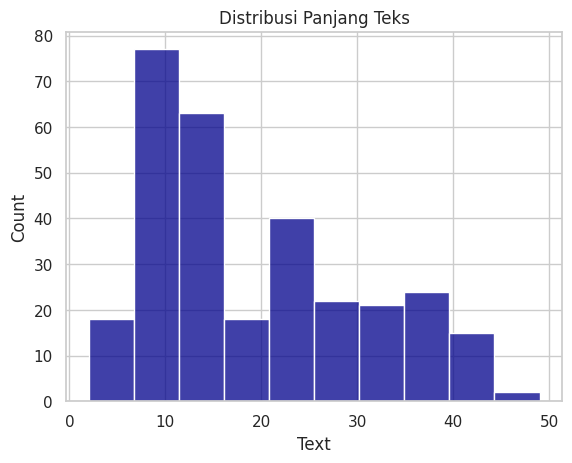

In [42]:
sns.histplot(data=dataset, x=dataset.Text.str.split().str.len(), bins='auto', color='darkblue');
plt.title('Distribusi Panjang Teks')

In [43]:
def evaluate_results(model, test_df):
    # Predict class labels using the learner function
    test_df['pred'] = model.predict(train_clean)
    y_true = dataset['Sentiment']
    y_pred = test_df['pred']
    target_names = ['negatif', 'netral','positif']

    # Print the Confusion Matrix
    results_log = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
    results_df_log = pd.DataFrame(results_log).transpose()
    print(results_df_log)
    matrix = confusion_matrix(y_true,  y_pred)
    sns.heatmap(pd.DataFrame(matrix),
                annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
    plt.xlabel('Predictions')
    plt.xlabel('Actual')

    model_score = score(y_pred, y_true, average='macro')
    return model_score

In [44]:
from sklearn.naive_bayes import MultinomialNB

              precision  recall  f1-score  support
negatif        0.980392    1.00  0.990099   100.00
netral         1.000000    0.94  0.969072   100.00
positif        0.961538    1.00  0.980392   100.00
accuracy       0.980000    0.98  0.980000     0.98
macro avg      0.980644    0.98  0.979854   300.00
weighted avg   0.980644    0.98  0.979854   300.00


<ipython-input-45-afbba285160e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = pd.DataFrame().append({'model_name': model_name,


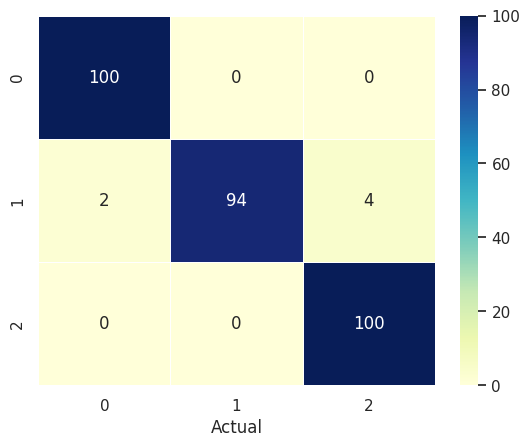

In [45]:
model_name = 'bayes classifier'

pipeline_bayes = Pipeline([
                ('count', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('gnb', MultinomialNB()),
                ])

# Train model using the created sklearn pipeline
model_bayes = pipeline_bayes.fit(train_clean, dataset['Sentiment'])

# Evaluate model performance
model_score = evaluate_results(model_bayes, test_df)
performance_df = pd.DataFrame().append({'model_name': model_name,
                                    'f1_score': model_score[0],
                                    'precision': model_score[1],
                                    'recall': model_score[2]}, ignore_index=True)

In [46]:
import pickle
f = open('bayes.pickle', 'wb')
pickle.dump(model_bayes, f)
f.close()

In [47]:
data_X = dataset['Text']
data_y = dataset['Sentiment']

In [48]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#max_vocab = 18000
#max_len = 15

#tokenizer = Tokenizer(num_words=max_vocab)
#tokenizer.fit_on_texts(data_X)
#sequences = tokenizer.texts_to_sequences(data_X)
#word_index = tokenizer.word_index
#print('Found %s unique tokens.' % len(word_index))
#data_keras = pad_sequences(sequences, maxlen=max_len, padding="post")

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(dataset['Text'])
vector = tokenizer.texts_to_sequences(dataset['Text'])

In [49]:
test1='Pemilu Tepat di Hari Valentine 2024, KPU: Bukan Tanggal Baru'
test2='penundaan pemilu masuk akal'
test3='masih nunggu pak wapres bersuara ttg penundaan pemilu'
test4='Tunda pemilu adalah akal2an saja tuk memperpanjang jabatan dan proyek IKN'
test5='pemilu ditunda tapi presidennya juga ganti'
test6='Saya rakyat, tidak mengizinkan tunda pemilu.'
test7='Berarti di majukan aja pemilu nanti pilihan nya di sudahi atau di perpanjang '
test8='Pemilu terlalu membebani bangsa, banyak biaya terbuang percuma'
test9='Situasi sedang sulit akibat mismanagemen 7 tahun terakhir maka diwacanakanlah undurkan pemilu dan 3 periode?? Biar ancur2an sekalian..'
test10='Kalimatnya abu2 ini, jangan menyuarakan itu artinya setuju atau ga nih, tinggal bilang aja saya tdk setuju penundaan pemilu dan perpanjang masa jabatan, selesai,'
test11='hupmas surabaya rabu malam kpu ri mengadakan rapat pimpinan rapim rangka pemilu pemilihan serentak bertempat hotel jw marriott surabaya'

testphrases = [test1, test2, test3, test4,test5,test6,test7,test8,test9,test10,test11]
for testphrase in testphrases:
    resultx = model_bayes.predict([testphrase]) # use model_bayes for predictions with the other model
    dict = { 1: 'Negatif',  2: 'Netral', 3: 'Positif'  }
    print(testphrase + '-> ' + dict[resultx[0]])

Pemilu Tepat di Hari Valentine 2024, KPU: Bukan Tanggal Baru-> Netral
penundaan pemilu masuk akal-> Positif
masih nunggu pak wapres bersuara ttg penundaan pemilu-> Positif
Tunda pemilu adalah akal2an saja tuk memperpanjang jabatan dan proyek IKN-> Negatif
pemilu ditunda tapi presidennya juga ganti-> Negatif
Saya rakyat, tidak mengizinkan tunda pemilu.-> Negatif
Berarti di majukan aja pemilu nanti pilihan nya di sudahi atau di perpanjang -> Positif
Pemilu terlalu membebani bangsa, banyak biaya terbuang percuma-> Positif
Situasi sedang sulit akibat mismanagemen 7 tahun terakhir maka diwacanakanlah undurkan pemilu dan 3 periode?? Biar ancur2an sekalian..-> Negatif
Kalimatnya abu2 ini, jangan menyuarakan itu artinya setuju atau ga nih, tinggal bilang aja saya tdk setuju penundaan pemilu dan perpanjang masa jabatan, selesai,-> Negatif
hupmas surabaya rabu malam kpu ri mengadakan rapat pimpinan rapim rangka pemilu pemilihan serentak bertempat hotel jw marriott surabaya-> Netral
